# Perspective Portfolio Idea Analysis using Modern Portfolio Theory (MPT)
Modern portfolio theory (MPT) is a theory on how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. According to the theory, it's possible to construct an "efficient frontier" of optimal portfolios offering the maximum possible expected return for a given level of risk.

MPT shows that an investor can construct a portfolio of multiple assets that will maximize returns for a given level of risk. Likewise, given a desired level of expected return, an investor can construct a portfolio with the lowest possible risk. Based on statistical measures such as variance and correlation, an individual investment's return is less important than how the investment behaves in the context of the entire portfolio.

Source: https://www.investopedia.com/terms/m/modernportfoliotheory.asp

Quantitative Value Investing merges mathematical analysis with the principles of value investing. By doing so, this strategy's purpose is to remove the emotion from investing and cuts through the noise of the market and media to make more rational decisions.

##### Disclosure: Stocks mentioned in this portfolio should not be taken as a recommendation to buy or sell any security, this is not financial advise. This is a portfolio idea which was created for perspective research only, using computational finance strategies for portfolio management and optimization. Statistical data within this case study are thoroughly researched and believed to be accurate using Yahoo Finance data package. However, discrepancies can occur with the data provided.  As an investor you should conduct your own research and recheck  for any missing data before making any final decisions regarding buying or selling any stocks. Past performances of stocks mentioned in this portfolio are not a guarantee of future performances. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

pd.options.display.float_format = '{:.2f}'.format

In [2]:
Test_Stocks = pd.read_csv("Test_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]

In [3]:
Test_Stocks = Test_Stocks.loc["2020-3-23":"2020-8-29"]

In [4]:
Test_Stocks.tail().dropna()

,AAPL,MSFT,PG,TSLA,VOO
Date,,,,,
2020-08-24,503.43,213.69,138.51,2014.20,315.10
2020-08-25,499.30,216.47,139.06,2023.34,316.20
2020-08-26,506.09,221.15,138.39,2153.17,319.43
2020-08-27,500.04,226.58,138.21,2238.75,320.07
2020-08-28,499.23,228.91,138.77,2213.40,322.15


This function is used to calculate a summary of daily returns and to create a column for Returns and Risks of the stocks mentioned in the portfolio for 130 trading days 

In [5]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return* 130
    summary.Risk = summary.Risk * np.sqrt(130)
    return summary

In [6]:
ret = Test_Stocks.pct_change().dropna()
ret.tail().dropna()

,AAPL,MSFT,PG,TSLA,VOO
Date,,,,,
2020-08-24,0.01,0.00,0.01,-0.02,0.01
2020-08-25,-0.01,0.01,0.00,0.00,0.00
2020-08-26,0.01,0.02,-0.00,0.06,0.01
2020-08-27,-0.01,0.02,-0.00,0.04,0.00
2020-08-28,-0.00,0.01,0.00,-0.01,0.01


In [7]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,0.98,0.28
MSFT,0.65,0.27
PG,0.44,0.19
TSLA,2.07,0.56
VOO,0.56,0.22


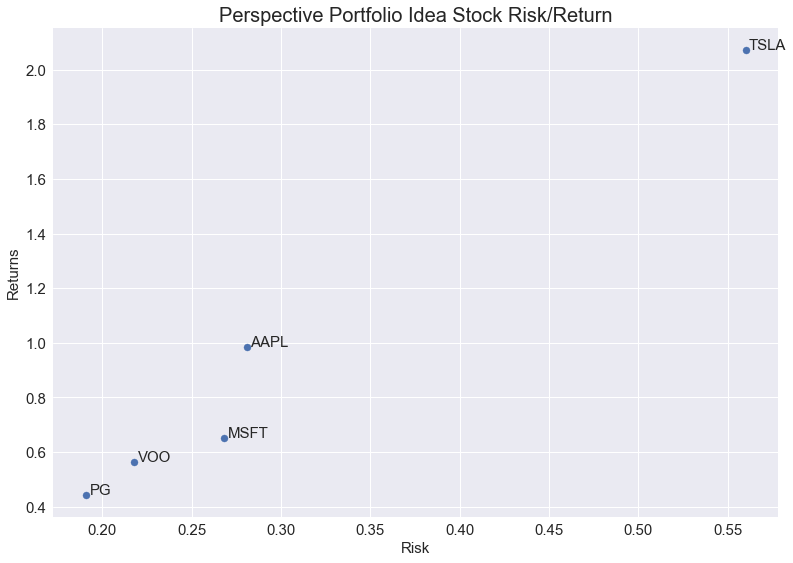

In [8]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Risk", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("Perspective Portfolio Idea Stock Risk/Return", fontsize = 20)
plt.show()

In [9]:
noa = len(Test_Stocks.columns)
nop = 200000
print(noa, nop)

5 200000


Creating simulation:
    
The Purpose of np.random.seed(123) is to prevent the values from repeating the same result. It makes sure we obtain differnt values for the simulation 

In [10]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

200,000 different weight combinations for each stock in the portfolio:

In [11]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [12]:
port_ret = ret.dot(weights.T)
port_ret.tail().dropna()

,0,1,2,3,4,5,6,7,8,9,...,199990,199991,199992,199993,199994,199995,199996,199997,199998,199999
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-24,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,-0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00
2020-08-25,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00
2020-08-26,0.02,0.02,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.03,0.02,0.01,0.02,0.03,0.02,0.02,0.02,0.02
2020-08-27,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01,...,0.01,0.02,0.01,0.00,0.01,0.02,0.01,0.01,0.01,0.01
2020-08-28,0.00,0.00,0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [13]:
port_summary = ann_risk_return(port_ret)
port_summary.tail().dropna()

,Return,Risk
199995,1.02,0.26
199996,0.91,0.22
199997,0.79,0.23
199998,0.96,0.24
199999,0.89,0.23


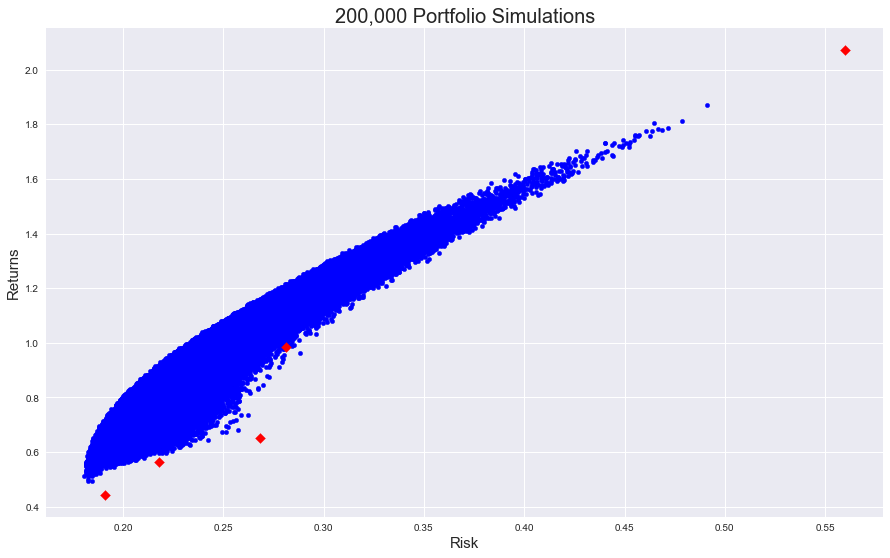

In [14]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "blue")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "red", marker = "D")
plt.xlabel('Risk', fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("200,000 Portfolio Simulations", fontsize = 20)
plt.show()

## Stock and Portfolio Analysis With The Sharpe Ratio

Sharpe Ratio is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

Since the Portfolio is from March 23 2020 to Aug 28 2020, we're going to be using the 3 month government bond as the Risk Free Rate, which is at 0.10% during the time when I checked the treasury yield making this case study. The Treasury yields are subjected to change. https://www.bloomberg.com/markets/rates-bonds/government-bonds/us use this website to track the treasury yields.

Risk Free Rate:

In theory, the risk-free rate is the minimum return an investor expects for any investment because he will not accept additional risk unless the potential rate of return is greater than the risk-free rate. In practice, however, the risk-free rate does not exist because even the safest investments carry a very small amount of risk. Thus, the interest rate on a three-month U.S. Treasury bill is often used as the risk-free rate for U.S.-based investors.
https://www.investopedia.com/terms/r/risk-freerate.asp

In [15]:
risk_free_return = 0.010
risk_free_risk = 0

In [16]:
rf = [risk_free_return, risk_free_risk]
rf

[0.01, 0]

In [17]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAPL,0.98,0.28,3.47
MSFT,0.65,0.27,2.40
PG,0.44,0.19,2.28
TSLA,2.07,0.56,3.68
VOO,0.56,0.22,2.54


In [18]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]
port_summary.tail().dropna()

,Return,Risk,Sharpe
199995,1.02,0.26,3.83
199996,0.91,0.22,4.04
199997,0.79,0.23,3.44
199998,0.96,0.24,3.99
199999,0.89,0.23,3.78


In [19]:
port_summary.describe()

,Return,Risk,Sharpe
count,200000.00,200000.00,200000.00
mean,0.94,0.25,3.77
std,0.17,0.03,0.28
min,0.49,0.18,2.61
25%,0.82,0.22,3.61
50%,0.94,0.24,3.83
75%,1.06,0.26,3.97
max,1.87,0.49,4.31


out of 200,000 portfolio simulations, our maximum results lead to an 1.87% return, 0.49% risk and sharpe ratio of 4.31. The best performing portfolios usually have a Sharpe Ratios with 1 or above which is ideal to look for. In over all return of this portfolio combination is greater then risk. 

Plot 200,000 Portfolio Sharpe Ratio Performances. "vmin" comes from "25%", "vmax" comes from max sharpe ratio, and "alpha" comes from "max return" this is also a trial and error process to get the most out of the chart. data inputs comform the describe chart.

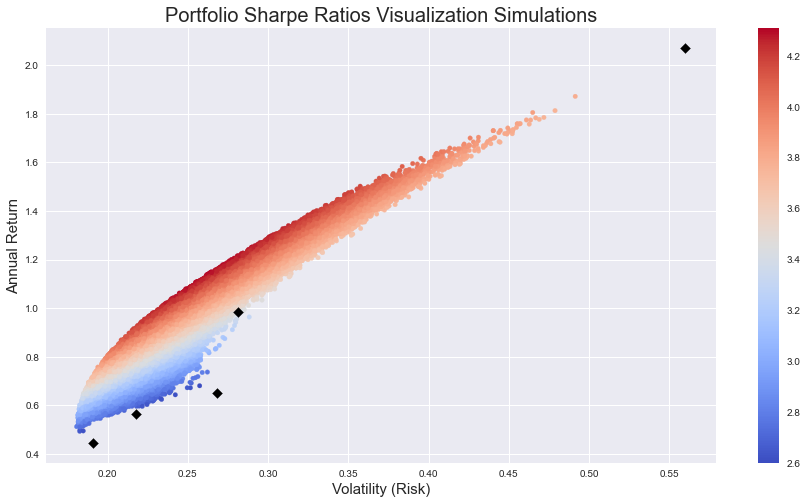

In [20]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 2.6, vmax = 4.31, alpha = 1.87)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("Volatility (Risk)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Portfolio Sharpe Ratios Visualization Simulations", fontsize = 20)
plt.show()

## The Optimal Portfolio - "Max Sharpe Ratio Portfolio"

In [21]:
msrp = port_summary.Sharpe.idxmax()
msrp

95620

In [22]:
port_summary.loc[msrp]

Return   1.14
Risk     0.26
Sharpe   4.31
Name: 95620, dtype: float64

In [23]:
msrp_w = weights[msrp, :]
msrp_w

array([0.36568553, 0.0048021 , 0.31810079, 0.30341678, 0.0079948 ])

In [24]:
pd.Series(index = Test_Stocks.columns, data = msrp_w)

AAPL   0.37
MSFT   0.00
PG     0.32
TSLA   0.30
VOO    0.01
dtype: float64

## Asset Allocation Performance Returns / Risk
Asset allocation is an investment strategy that aims to balance risk and reward by apportioning a portfolio's assets according to an individual's goals, risk tolerance, and investment horizon.

### Portfolio Returns

In [25]:
returns = (Test_Stocks / Test_Stocks.shift(1)) - 1

Max Sharpe Ratio Porfolio Return

In [26]:
weights = np.array([0.37, 0.00, 0.32, 0.30, 0.01])

In [27]:
allo_returns = returns.mean() * 130
allo_returns

AAPL   0.98
MSFT   0.65
PG     0.44
TSLA   2.07
VOO    0.56
dtype: float64

In [28]:
np.dot(allo_returns, weights)

1.1335597584983623

In [29]:
pfolio_1 = str(round(np.dot(allo_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

113.356 %


Equally Weighted Portfolio Return

In [30]:
weights_2 = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

In [31]:
pfolio_2 = str(round(np.dot(allo_returns, weights_2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

113.356 %
94.342 %


Perspective allocations I think are more balanced / Conservative 

APPL: 25%

MSFT: 15%

PG: 15%

TSLA: 5%

VOO: 40%

In [33]:
weights_3 = np.array([0.25, 0.15, 0.15, 0.05, 0.40])

In [34]:
pfolio_3 = str(round(np.dot(allo_returns, weights_3), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)
print (pfolio_3)

113.356 %
94.342 %
73.969 %


### Portfolio Risk 

In [35]:
Port_returns = np.log(Test_Stocks / Test_Stocks.shift(1) )

In [36]:
Port_returns[['AAPL', 'MSFT', 'PG', 'TSLA', 'VOO']].mean() * 130

AAPL   0.94
MSFT   0.62
PG     0.43
TSLA   1.91
VOO    0.54
dtype: float64

In [37]:
Port_returns[['AAPL', 'MSFT', 'PG', 'TSLA', 'VOO']].std() * 130 ** 0.5

AAPL   0.28
MSFT   0.26
PG     0.19
TSLA   0.55
VOO    0.22
dtype: float64

Covariance measures the directional relationship between the returns on two assets. A positive covariance means that asset returns move together while a negative covariance means they move inversely.

In [38]:
cov_matrix = Port_returns.cov()

In [39]:
cov_matrix_a = Port_returns.cov() * 130

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

In [40]:
corr_matrix = Port_returns.corr()

Max Sharpe Ratio Risk

Portfolio Variance is a measure of the dispersion of returns of a portfolio. It is the aggregate of the actual returns of a given portfolio over a set period of time. Modern portfolio theory (MPT) states that portfolio variance can be reduced by selecting securities with low or negative correlations in which to invest, such as stocks and bonds.

In [41]:
pfolio_var = np.dot(weights.T, np.dot(Port_returns.cov() * 130, weights))
pfolio_var

0.06518836519058058

Portfolio Volatility is a measure of how wildly the total value of all the stocks in that portfolio appreciates or declines.

In [42]:
pfolio_vol = (np.dot(weights.T, np.dot(Port_returns.cov() * 130, weights))) ** 0.5
pfolio_vol

0.25532012296444745

In [43]:
print (str(round(pfolio_vol, 5) * 100) + ' %')

25.532 %


Equally Weighed Portfolio Risk

In [44]:
weights_2 = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

In [45]:
pfolio_var = np.dot(weights.T, np.dot(Port_returns.cov() * 130, weights_2))
pfolio_var

0.05884023494164157

In [46]:
pfolio_vol = (np.dot(weights.T, np.dot(Port_returns.cov() * 130, weights_2))) ** 0.5
pfolio_vol

0.24257006192364625

In [47]:
print (str(round(pfolio_vol, 5) * 100) + ' %')

24.257 %


Allocations I chosen which seem to be more balanced / conservative

In [48]:
weights_3 = np.array([0.25, 0.15, 0.15, 0.05, 0.40])

In [50]:
pfolio_var = np.dot(weights.T, np.dot(Port_returns.cov() * 130, weights_3))
pfolio_var

0.047965591470108405

In [51]:
pfolio_vol = (np.dot(weights.T, np.dot(Port_returns.cov() * 130, weights_3))) ** 0.5
pfolio_vol

0.21901048255758993

In [52]:
print (str(round(pfolio_vol, 5) * 100) + ' %')

21.901 %


## Including the Market Portfolio For Equity Portfolio Section

A market portfolio is a theoretical bundle of investments that includes every type of asset available in the investment universe, with each asset weighted in proportion to its total presence in the market. The expected return of a market portfolio is identical to the expected return of the market as a whole.

A market portfolio, by nature of being completely diversified, is subject only to systematic risk, or risk that affects the market as a whole, and not to unsystematic risk, which is the risk inherent to a particular asset class. In this case study we will be using the S&P 500 Index as the Market Portfolio which will also serve as a benchmark. https://www.investopedia.com

In [53]:
Test_Stocks = pd.read_csv("Test_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]
SP500_Index =  pd.read_csv("SP500.csv", index_col = "Date", parse_dates = ["Date"])["Adj Close"].to_frame()

In [55]:
Test_Stocks = Test_Stocks.loc["2020-3-23":"2020-8-29"]
SP500_Index = SP500_Index.loc["2020-3-23":"2020-8-29"]

In [56]:
SP500_Index.tail().dropna()

,Adj Close
Date,
2020-08-24,3431.28
2020-08-25,3443.62
2020-08-26,3478.73
2020-08-27,3484.55
2020-08-28,3508.01


In [57]:
Test_Stocks["MP"] = SP500_Index["Adj Close"]

In [58]:
Test_Stocks.tail().dropna()

,AAPL,MSFT,PG,TSLA,VOO,MP
Date,,,,,,
2020-08-24,503.43,213.69,138.51,2014.20,315.10,3431.28
2020-08-25,499.30,216.47,139.06,2023.34,316.20,3443.62
2020-08-26,506.09,221.15,138.39,2153.17,319.43,3478.73
2020-08-27,500.04,226.58,138.21,2238.75,320.07,3484.55
2020-08-28,499.23,228.91,138.77,2213.40,322.15,3508.01


In [59]:
ret = Test_Stocks.pct_change().dropna() 
# ret, when inputting "ret" it'll bring up a list of the daily returns

In [60]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return* 130
    summary.Risk = summary.Risk * np.sqrt(130)
    return summary

In [61]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,0.98,0.28
MSFT,0.65,0.27
PG,0.44,0.19
TSLA,2.07,0.56
VOO,0.56,0.22
MP,0.55,0.22


In [62]:
risk_free_return = 0.010
risk_free_risk = 0

In [63]:
rf = [risk_free_return, risk_free_risk]
rf

[0.01, 0]

In [64]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAPL,0.98,0.28,3.47
MSFT,0.65,0.27,2.40
PG,0.44,0.19,2.28
TSLA,2.07,0.56,3.68
VOO,0.56,0.22,2.54
MP,0.55,0.22,2.45


## Systematic and Unsystematic Risk  Including the Market Portfolio

Systematic risk refers to the risk inherent to the entire market or market segment. Systematic risk, also known as “undiversifiable risk,” “volatility” or “market risk,” affects the overall market, not just a particular stock or industry. This type of risk is both unpredictable and impossible to completely avoid. It cannot be mitigated through diversification, only through hedging or by using the correct asset allocation strategy.

Unsystematic risk is unique to a specific company or industry. Also known as “nonsystematic risk,” "specific risk," "diversifiable risk" or "residual risk," in the context of an investment portfolio, unsystematic risk can be reduced through diversification.

Variance is used to compare the relative performance of each asset in a portfolio:

In [65]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)
summary

,Return,Risk,Sharpe,TotalRisk_var
AAPL,0.98,0.28,3.47,0.08
MSFT,0.65,0.27,2.40,0.07
PG,0.44,0.19,2.28,0.04
TSLA,2.07,0.56,3.68,0.31
VOO,0.56,0.22,2.54,0.05
MP,0.55,0.22,2.45,0.05


In statistics, covariance is a metric used to measure how one random variable moves in relation to another random variable. In investment, covariance of returns measures how the rate of return on one asset varies in relation to the rate of return on other assets or a portfolio.

In [66]:
COV = ret.cov()*130
# COV, if we add "COV" it'll create a long chart

In [67]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [68]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AAPL,0.98,0.28,3.47,0.08,0.05,0.03
MSFT,0.65,0.27,2.40,0.07,0.05,0.02
PG,0.44,0.19,2.28,0.04,0.03,0.01
TSLA,2.07,0.56,3.68,0.31,0.06,0.26
VOO,0.56,0.22,2.54,0.05,0.05,-0.00
MP,0.55,0.22,2.45,0.05,0.05,-0.00


### Systematic and Unsystematic risk of stocks including the Market Portfolio (MP = S&P500 Index):

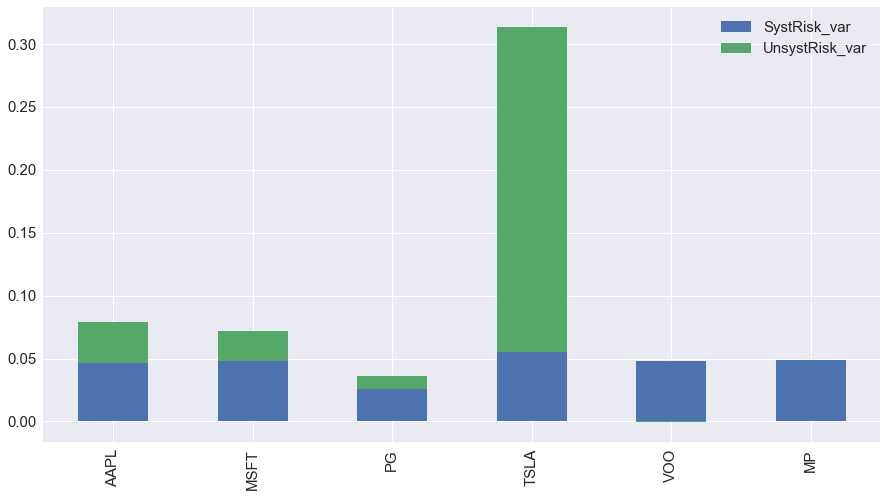

In [69]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Quick note: Notice that VOO is only subjected to systematic risk and not unsystematic risk? this is because VOO is the Vanguard S&P 500 ETF which tracks the performance of the S&P 500 index. 

### Determining the beta of the stocks in the portfolio compared to the Market Portfolio (S&P 500 Index):

Beta is a measure of the volatility (Risk), or systematic risk, of a security or portfolio, in comparison to the market as a whole. 

In [70]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AAPL,0.98,0.28,3.47,0.08,0.05,0.03,0.96
MSFT,0.65,0.27,2.40,0.07,0.05,0.02,0.98
PG,0.44,0.19,2.28,0.04,0.03,0.01,0.53
TSLA,2.07,0.56,3.68,0.31,0.06,0.26,1.13
VOO,0.56,0.22,2.54,0.05,0.05,-0.00,0.99
MP,0.55,0.22,2.45,0.05,0.05,-0.00,1.00


## Determining The Security Market Line For Equities Portfolio Section

The security market line is an investment evaluation tool derived from the CAPM—a model that describes risk-return relationship for securities—and is based on the assumption that investors need to be compensated for both the time value of money (TVM) and the corresponding level of risk associated with any investment, referred to as the risk premium.

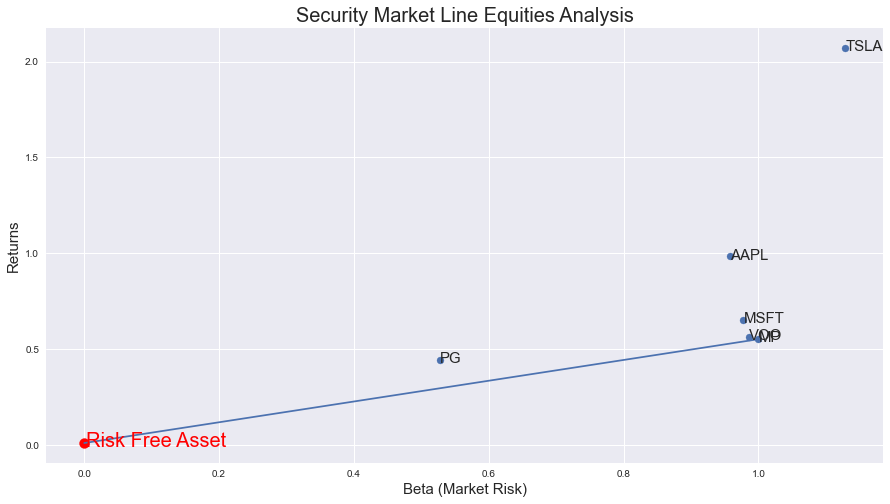

In [71]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["MP", "beta"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "red")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "Red")
plt.xlabel("Beta (Market Risk)", fontsize = 15)
plt.ylabel("Returns", fontsize = 15)
plt.title("Security Market Line Equities Analysis", fontsize = 20)
plt.show()

Security Market Line Analysis: Stocks that fall below the SML is an indictor that they are underperforming the market. Meanwhile stocks above the SML indicate that they are outperforming the market. Stocks that are underperforming the market also have negative alpha values.

Stocks with the beta above 1, means that they get largely affected by market condidtions in a postive and a negative way due to systematic risk. If the S&P 500 were to drop around 5%, these stocks would be likely to drop towards 8 to 10% in a day and if the S&P500 would of rallyed 5% then those stocks would gained 8 to 10% in a day. In other words high beta stock tend to have more risk, with greater risk comes greater potential reward. 


### Including the Capital Asset Pricing Model and Alpha of the stocks with the Market Portfolio

The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks. CAPM is widely used throughout finance for pricing risky securities and generating expected returns for assets given the risk of those assets and cost of capital.

"Alpha" (the Greek letter α) is a term used in investing to describe a strategy's ability to beat the market, or it's "edge." Alpha is thus also often referred to as “excess return” or “abnormal rate of return,” which refers to the idea that markets are efficient, and so there is no way to systematically earn returns that exceed the broad market as a whole. Alpha is often used in conjunction with beta (the Greek letter β) , which measures the broad market's overall volatility or risk, known as systematic market risk

In [72]:
summary["CAPM_Ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

In [73]:
summary["Alpha Value"] = summary.Return - summary.CAPM_Ret
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,CAPM_Ret,Alpha Value
AAPL,0.98,0.28,3.47,0.08,0.05,0.03,0.96,0.53,0.45
MSFT,0.65,0.27,2.40,0.07,0.05,0.02,0.98,0.54,0.11
PG,0.44,0.19,2.28,0.04,0.03,0.01,0.53,0.30,0.15
TSLA,2.07,0.56,3.68,0.31,0.06,0.26,1.13,0.62,1.45
VOO,0.56,0.22,2.54,0.05,0.05,-0.00,0.99,0.54,0.02
MP,0.55,0.22,2.45,0.05,0.05,-0.00,1.00,0.55,0.00


CAPM Analysis of Equities: Since we know that the CAPM is used for determining expected returns on stocks, we can notice that each stock is expected to reach positve returns, We can also notice that stocks with the highest betas are expected to have higher returns. This could of course change do to systematic condidtons.  

Alpha Analysis of Equities: Understanding that Alpha is used to determine whether or not a stock would beat the overall market. We can notice that stocks in the Portfolio that have a chance of not beating the over all market are the stocks below the Security Market Line which have a negative alpha value.